Kianosh Arian 810198345, Project Number Five, Phase 2

Project Objective:
The goal of this project is to build a neural network to classify images into four categories of animals and to analyze the impact of different parameters on this neural network.

Overview:
In this project, we first read a dataset containing various animals and store it in a TensorFlow dataset. Then, we convert these images to grayscale and one-hot encode the labels. After that, we create a neural network and train it on the data. We will experiment with different parameters such as optimizer, epoch, regularization, and loss function to optimize our network. Finally, we evaluate this network on test data. The data loaded in this project are divided into train and test sets, each organized into folders based on their category. We use a predefined Keras function to read these categorized folders.

Phase 1 - Preprocessing:
We read the data using Keras' categorical image reading function, then convert them to grayscale and one-hot encode them. The reason for one-hot encoding is that our data is categorical, and different categories are unrelated to each other. If we convert them to regular numbers, it would imply a relationship between the numbers and hence between the categories. Since they are unrelated, we use one-hot encoding to allow the use of the CategoricalCrossentropy loss function.

Phase 2 - Designing the Neural Network:
In this section, we build a neural network based on the given criteria, consisting of dense and flatten layers. The number of parameters in this network:

Layer (type)
Output Shape
Param #

Rescaling (Rescaling)
(None, 256, 256, 1)
0

Resizing (Resizing)
(None, 50, 50, 1)
0

Flatten (Flatten)
(None, 2500)
0

Dense (Dense)
(None, 200)
500200

Dense_1 (Dense)
(None, 4)
804

Since our images are 50x50, the output of the flatten layer is 2500, and the next dense layer has 200 nodes. Therefore, we have 200*2500=500000 parameters, plus 200 for the bias, making a total of 500200 parameters.

Phase 3 - Data Classification:

Part 1:
Momentum is one of the optimizer parameters that works by ignoring small errors when the model is progressing in one direction and continues to advance in that direction. When we use momentum, the model captures less noise from the data, potentially improving the model. With a momentum of 0.5, the model's predictions improve and get better, but with a momentum of 0.9, the predictions get worse, weakening the model. No, if the momentum is too high, it will ignore too many incorrect data points and worsen the model instead of improving it. When using Adam, the result is better than regular SGD and almost equal to the result obtained with SGD and momentum=0.5.

Part 2:
Using 20 epochs improves our results. This is because algorithms like SGD gradually approach the correct solution, and it may not reach the correct answer in one pass through the data. Therefore, we use multiple epochs to allow SGD to get sufficiently close to the final answer. It is not always necessary to use multiple epochs; if we reach the desired coefficients and accuracy in the first pass, we can stop there to avoid overfitting. When training the model for 90 epochs and then testing it on the test data, we see that overfitting has occurred, and the performance on the test is weaker than on the train. No, using too many epochs is not desirable due to overfitting. To prevent this, we can use early stopping mechanisms, which will stop the model once it reaches a specified point, even if all epochs are not completed.

Part 3:
The MSE function gives us much weaker results for several reasons. The MSE function is not suitable for classification. One reason is that when using this function, our input dataset should have a normal distribution, whereas in categorical problems, the data is divided into several categories and is not normally distributed. Also, this function is suitable for predicting numerical values in regression problems. In classification problems, our output is a softmax function that gives values between 0 and 1, while MSE expects values between negative and positive infinity and does not provide a good minimum point. MSE is appropriate for regression problems with normally distributed data.

Part 4:
L2 regularization adds a coefficient of weights to the loss function to prevent the model from creating large weights and relying on only one parameter. Dropout randomly removes some nodes during each training iteration to prevent overfitting. Applying L2 regularization improves our F1 score, while applying dropout weakens the model's performance.

The errors could be due to the camera being too close to the subjects in the photos or the presence of multiple animals in one image.

In [ ]:
from google.colab import drive
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data
train_data=tf.keras.utils.image_dataset_from_directory("/content/drive/My Drive/dataset.zip (Unzipped Files)/dataset/train")
count=0
#count images
for element in train_data:
  count+=len(element[0])
print("number of train data:", count)
class_names = train_data.class_names
print("number of classes:", len(class_names))

Found 1953 files belonging to 4 classes.
number of train data: 1953
number of classes: 4


In [ ]:
test_data=tf.keras.utils.image_dataset_from_directory("/content/drive/My Drive/dataset.zip (Unzipped Files)/dataset/test")

def grayscale(x,y):
  image = tf.image.rgb_to_grayscale(x)
  return image, y;
test_data=test_data.map(grayscale)


def onehot(x,y):
  label = tf.one_hot(y, len(class_names))
  return x, label;
test_data=test_data.map(onehot)

Found 840 files belonging to 4 classes.


bald_eagle 523
elk 462
racoon 509
raven 459


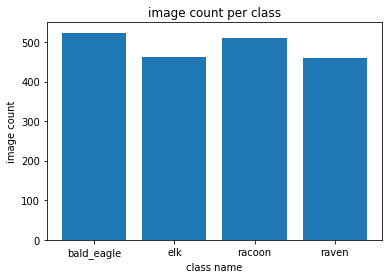

In [ ]:
#class count and plot
class_counts = []
for i in range(len(class_names)):
  class_counts.append(0)
for element, labels in train_data:
  for i in labels.numpy():
    class_counts[i]+=1
for i in range(len(class_names)):
  print(class_names[i], class_counts[i])
plt.bar(class_names, class_counts)
plt.xlabel("class name")
plt.ylabel("image count")
plt.title("image count per class")
plt.show()

In [ ]:
#convert data to grayscale
def grayscale(x,y):
  image = tf.image.rgb_to_grayscale(x)
  return image, y;
train_data=train_data.map(grayscale)

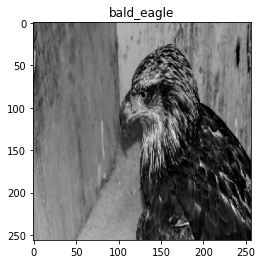

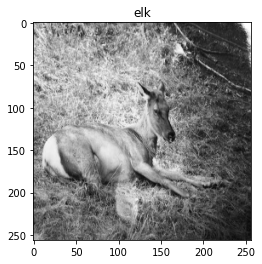

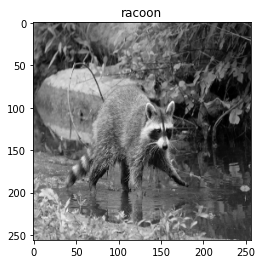

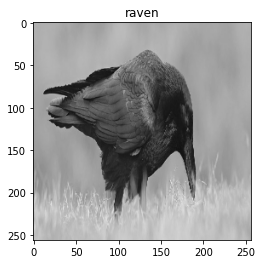

In [ ]:
#show an image from each class
found=0
for k in range(4):
  found=0
  for images, labels in train_data.take(1):
    for i in range(len(images)):
      if(labels[i]==k):
        image=tf.image.grayscale_to_rgb(images[i])
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.show()
        found=1
        break
    if(found):
      break

In [ ]:
#one hot the labels
def onehot(x,y):
  label = tf.one_hot(y, len(class_names))
  return x, label;
train_data=train_data.map(onehot)

In [ ]:
#split to train and validatoin
train_portion=0.8
validation_portion=0.2
train_ds = train_data.take(int(count*train_portion))
val_ds = train_data.skip(int(count*train_portion)).take(int(count*validation_portion))
metric=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]

In [ ]:
#model a neural network
#first normalize the images, then resize to 50px to 50px then other layers
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)


In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=10
)
print(model.summary())

Epoch 1/10
62/62 [==============================] - 24s 332ms/step - loss: 1.3422 - accuracy: 0.3513 - precision: 0.4823 - recall: 0.0696
Epoch 2/10
62/62 [==============================] - 24s 335ms/step - loss: 1.2244 - accuracy: 0.4378 - precision: 0.6326 - recall: 0.1331
Epoch 3/10
62/62 [==============================] - 24s 336ms/step - loss: 1.1725 - accuracy: 0.4905 - precision: 0.6783 - recall: 0.1695
Epoch 4/10
62/62 [==============================] - 24s 336ms/step - loss: 1.1468 - accuracy: 0.4921 - precision: 0.6780 - recall: 0.2048
Epoch 5/10
62/62 [==============================] - 24s 336ms/step - loss: 1.1259 - accuracy: 0.5248 - precision: 0.7008 - recall: 0.2243
Epoch 6/10
62/62 [==============================] - 24s 334ms/step - loss: 1.1021 - accuracy: 0.5479 - precision: 0.7178 - recall: 0.2514
Epoch 7/10
62/62 [==============================] - 24s 335ms/step - loss: 1.0511 - accuracy: 0.5643 - precision: 0.7582 - recall: 0.2729
Epoch 8/10
62/62 [================

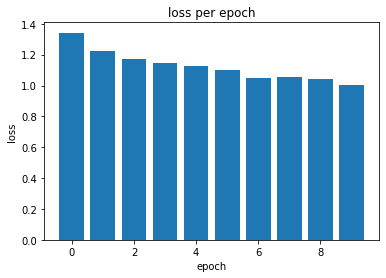

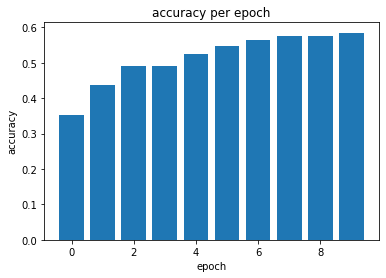

recalls: [0.06963645666837692, 0.13312852382659912, 0.16948284208774567, 0.20481310784816742, 0.22427035868167877, 0.25140810012817383, 0.27291345596313477, 0.30158731341362, 0.299539178609848, 0.34459805488586426]
percisions: [0.4822694957256317, 0.6326034069061279, 0.6782786846160889, 0.6779661178588867, 0.7008000016212463, 0.7178362607955933, 0.758179247379303, 0.7474619150161743, 0.7433291077613831, 0.758737325668335]
f1s: [0.1217002233656015, 0.2199661640033808, 0.2712003212583449, 0.31458906954503785, 0.33979829961528824, 0.3723928821370294, 0.40135541250764617, 0.42977016658434863, 0.427007309140431, 0.4739436642796339]


In [ ]:
#show model stats and information
import numpy as np
def model_stats(model):
  losses=model.history.history['loss']
  accs=model.history.history['accuracy']
  epochs=model.history.epoch
  plt.bar(epochs, losses)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("loss per epoch")
  plt.show()
  plt.bar(epochs, accs)
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("accuracy per epoch")
  plt.show()
  recalls=model.history.history['recall']
  print("recalls:", recalls)
  percisions=model.history.history['precision']
  print("percisions:", percisions)
  f1=2*((np.multiply(percisions, recalls))/np.add(percisions, recalls))
  print("f1s:", list(f1))

model_stats(model)

Epoch 1/10
62/62 [==============================] - 26s 347ms/step - loss: 1.3273 - accuracy: 0.3630 - precision: 0.4868 - recall: 0.1039
Epoch 2/10
62/62 [==============================] - 25s 347ms/step - loss: 1.2036 - accuracy: 0.4480 - precision: 0.6106 - recall: 0.1823
Epoch 3/10
62/62 [==============================] - 25s 347ms/step - loss: 1.1578 - accuracy: 0.4946 - precision: 0.6672 - recall: 0.2268
Epoch 4/10
62/62 [==============================] - 25s 345ms/step - loss: 1.1027 - accuracy: 0.5243 - precision: 0.6937 - recall: 0.2494
Epoch 5/10
62/62 [==============================] - 25s 346ms/step - loss: 1.0682 - accuracy: 0.5556 - precision: 0.7201 - recall: 0.2806
Epoch 6/10
62/62 [==============================] - 25s 348ms/step - loss: 1.1014 - accuracy: 0.5479 - precision: 0.7184 - recall: 0.2560
Epoch 7/10
62/62 [==============================] - 25s 351ms/step - loss: 1.0085 - accuracy: 0.5878 - precision: 0.7460 - recall: 0.3385
Epoch 8/10
62/62 [================

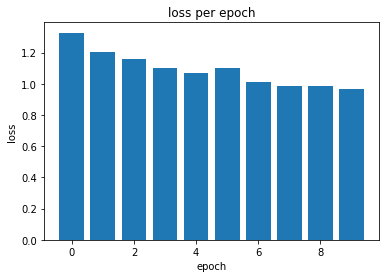

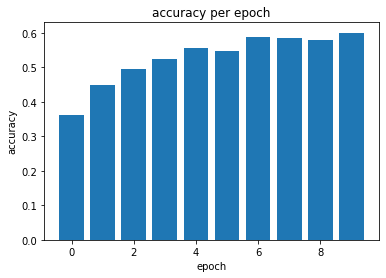

recalls: [0.10394265502691269, 0.1822836697101593, 0.22683051228523254, 0.24935996532440186, 0.28059396147727966, 0.2560163736343384, 0.33845365047454834, 0.3568868339061737, 0.37019968032836914, 0.38300052285194397]
percisions: [0.486810564994812, 0.6106346249580383, 0.6671686768531799, 0.6937322020530701, 0.7201051115989685, 0.7183908224105835, 0.7460496425628662, 0.7367864847183228, 0.731041431427002, 0.7413280606269836]
f1s: [0.1713080213726178, 0.2807570995344886, 0.3385555928683005, 0.3668549985510287, 0.4038319838199699, 0.37750093380317884, 0.4656569077875965, 0.48085546445750516, 0.4915023628017029, 0.5050641582844252]


In [ ]:
#train model with momentum 0.5
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=10
)
model_stats(model)

Epoch 1/10
62/62 [==============================] - 26s 354ms/step - loss: 1.3481 - accuracy: 0.3671 - precision: 0.4574 - recall: 0.1101
Epoch 2/10
62/62 [==============================] - 25s 349ms/step - loss: 1.3004 - accuracy: 0.4045 - precision: 0.5506 - recall: 0.1254
Epoch 3/10
62/62 [==============================] - 25s 353ms/step - loss: 1.2487 - accuracy: 0.4352 - precision: 0.5988 - recall: 0.1536
Epoch 4/10
62/62 [==============================] - 25s 352ms/step - loss: 1.1781 - accuracy: 0.4526 - precision: 0.6197 - recall: 0.1961
Epoch 5/10
62/62 [==============================] - 25s 354ms/step - loss: 1.2154 - accuracy: 0.4219 - precision: 0.6526 - recall: 0.1664
Epoch 6/10
62/62 [==============================] - 25s 345ms/step - loss: 1.1613 - accuracy: 0.4578 - precision: 0.6438 - recall: 0.2017
Epoch 7/10
62/62 [==============================] - 25s 350ms/step - loss: 1.1058 - accuracy: 0.5120 - precision: 0.6799 - recall: 0.2893
Epoch 8/10
62/62 [================

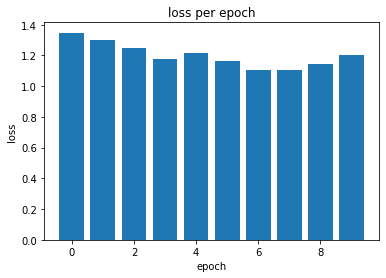

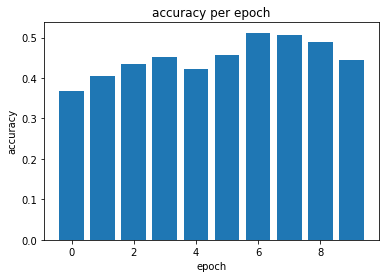

recalls: [0.11008704453706741, 0.12544803321361542, 0.15360982716083527, 0.19610854983329773, 0.1664106547832489, 0.20174090564250946, 0.28929850459098816, 0.2790578603744507, 0.2524321675300598, 0.21966205537319183]
percisions: [0.457446813583374, 0.550561785697937, 0.598802387714386, 0.6197410821914673, 0.6526104211807251, 0.6437908411026001, 0.6799037456512451, 0.6495828628540039, 0.6452879309654236, 0.5941828489303589]
f1s: [0.17746595033843898, 0.204336952648372, 0.24449877198114447, 0.2979385419321927, 0.26519788243357323, 0.3072124679608138, 0.40589079695916236, 0.39040115151046223, 0.36290026561193006, 0.32074766377073677]


In [ ]:
#train model with momentum 0.9
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=10
)
model_stats(model)

Epoch 1/10
62/62 [==============================] - 26s 346ms/step - loss: 1.4056 - accuracy: 0.3738 - precision: 0.4758 - recall: 0.1362
Epoch 2/10
62/62 [==============================] - 25s 347ms/step - loss: 1.2085 - accuracy: 0.4670 - precision: 0.6047 - recall: 0.2217
Epoch 3/10
62/62 [==============================] - 25s 354ms/step - loss: 1.1314 - accuracy: 0.5131 - precision: 0.6433 - recall: 0.2770
Epoch 4/10
62/62 [==============================] - 25s 352ms/step - loss: 1.2110 - accuracy: 0.4567 - precision: 0.6073 - recall: 0.2724
Epoch 5/10
62/62 [==============================] - 25s 351ms/step - loss: 1.1045 - accuracy: 0.5233 - precision: 0.6609 - recall: 0.3144
Epoch 6/10
62/62 [==============================] - 25s 352ms/step - loss: 1.0117 - accuracy: 0.5643 - precision: 0.7158 - recall: 0.3405
Epoch 7/10
62/62 [==============================] - 25s 354ms/step - loss: 1.0132 - accuracy: 0.5725 - precision: 0.7134 - recall: 0.3466
Epoch 8/10
62/62 [================

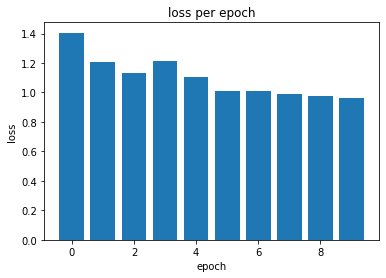

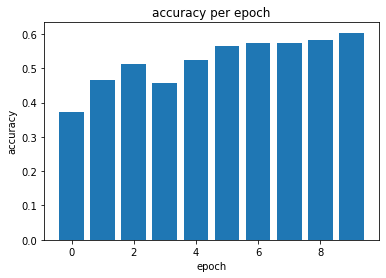

recalls: [0.1362007111310959, 0.2217101901769638, 0.2770097255706787, 0.2724014222621918, 0.31438812613487244, 0.3405017852783203, 0.34664618968963623, 0.3886328637599945, 0.3983615040779114, 0.4372759759426117]
percisions: [0.4758497178554535, 0.6047486066818237, 0.6432818174362183, 0.6073059439659119, 0.6609257459640503, 0.7158234715461731, 0.7133824825286865, 0.7167139053344727, 0.7040724158287048, 0.7134503126144409]
f1s: [0.21178343121418974, 0.3244660934248374, 0.3872584097217523, 0.37610462123083305, 0.4260929998683652, 0.46148507466028277, 0.46657477451510054, 0.5039840624041138, 0.508829312097091, 0.5422222205877301]


In [ ]:
#train model with adam optimizer
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=10
)
model_stats(model)

Epoch 1/20
62/62 [==============================] - 26s 349ms/step - loss: 1.6072 - accuracy: 0.3559 - precision: 0.4233 - recall: 0.1398
Epoch 2/20
62/62 [==============================] - 25s 347ms/step - loss: 1.2272 - accuracy: 0.4531 - precision: 0.5964 - recall: 0.2012
Epoch 3/20
62/62 [==============================] - 25s 347ms/step - loss: 1.1539 - accuracy: 0.4813 - precision: 0.6486 - recall: 0.2079
Epoch 4/20
62/62 [==============================] - 25s 350ms/step - loss: 1.1705 - accuracy: 0.4788 - precision: 0.5974 - recall: 0.2606
Epoch 5/20
62/62 [==============================] - 25s 347ms/step - loss: 1.1605 - accuracy: 0.4869 - precision: 0.6189 - recall: 0.2652
Epoch 6/20
62/62 [==============================] - 25s 347ms/step - loss: 1.0948 - accuracy: 0.5146 - precision: 0.6482 - recall: 0.3123
Epoch 7/20
62/62 [==============================] - 25s 346ms/step - loss: 1.0339 - accuracy: 0.5622 - precision: 0.7228 - recall: 0.3098
Epoch 8/20
62/62 [================

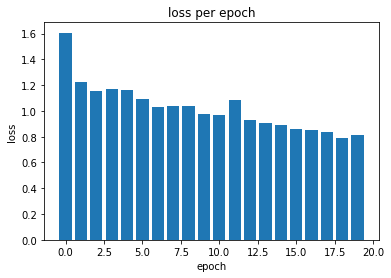

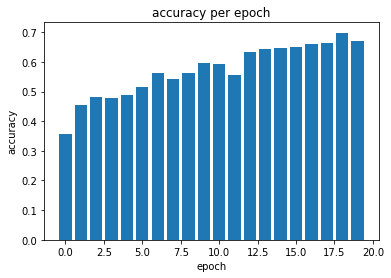

recalls: [0.13978494703769684, 0.20122887194156647, 0.20788531005382538, 0.2606246769428253, 0.26523298025131226, 0.31233999133110046, 0.3097798228263855, 0.32258063554763794, 0.3430619537830353, 0.36968764662742615, 0.3911930322647095, 0.3430619537830353, 0.3911930322647095, 0.41679468750953674, 0.44802868366241455, 0.4833589494228363, 0.4930875599384308, 0.5171530842781067, 0.5488991141319275, 0.5130568146705627]
percisions: [0.4232558012008667, 0.5963581204414368, 0.6485623121261597, 0.5974178314208984, 0.6188769340515137, 0.6482465267181396, 0.7228195667266846, 0.6938325762748718, 0.7089946866035461, 0.74663907289505, 0.7297039031982422, 0.6760847568511963, 0.7639999985694885, 0.7842003703117371, 0.768892765045166, 0.7763158082962036, 0.7703999876976013, 0.7692307829856873, 0.802395224571228, 0.7725520133972168]
f1s: [0.21016166215093418, 0.3009188289068704, 0.31485072491038657, 0.36292334656210995, 0.3713261687755584, 0.42156184941413233, 0.43369174838066094, 0.4404054390774428, 0

In [ ]:
#train model with adam and 20 epochs
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=20
)
model_stats(model)

Epoch 1/90
62/62 [==============================] - 26s 356ms/step - loss: 1.5984 - accuracy: 0.3338 - precision: 0.6490 - recall: 0.3033
Epoch 2/90
62/62 [==============================] - 25s 356ms/step - loss: 1.2720 - accuracy: 0.4183 - precision: 0.5493 - recall: 0.1198
Epoch 3/90
62/62 [==============================] - 25s 354ms/step - loss: 1.1955 - accuracy: 0.4685 - precision: 0.6112 - recall: 0.1843
Epoch 4/90
62/62 [==============================] - 25s 356ms/step - loss: 1.1679 - accuracy: 0.4839 - precision: 0.6411 - recall: 0.2478
Epoch 5/90
62/62 [==============================] - 25s 357ms/step - loss: 1.0876 - accuracy: 0.5387 - precision: 0.7133 - recall: 0.2765
Epoch 6/90
62/62 [==============================] - 25s 355ms/step - loss: 1.1162 - accuracy: 0.5243 - precision: 0.6678 - recall: 0.3077
Epoch 7/90
62/62 [==============================] - 25s 357ms/step - loss: 1.0197 - accuracy: 0.5801 - precision: 0.7344 - recall: 0.3144
Epoch 8/90
62/62 [================

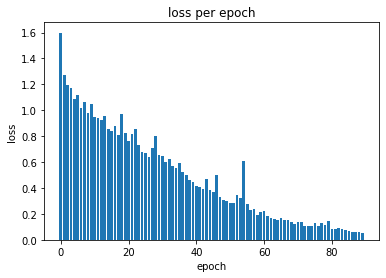

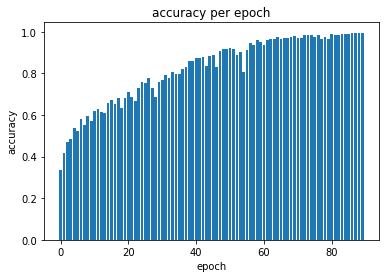

recalls: [0.30325815081596375, 0.11981566995382309, 0.18433180451393127, 0.24782386422157288, 0.2764976918697357, 0.3077316880226135, 0.31438812613487244, 0.35330259799957275, 0.36763954162597656, 0.3420378863811493, 0.39170506596565247, 0.43471580743789673, 0.4521249234676361, 0.4229390621185303, 0.4854070544242859, 0.5012800693511963, 0.52073734998703, 0.5253456234931946, 0.4777265787124634, 0.521761417388916, 0.5529953837394714, 0.5350742340087891, 0.5248335599899292, 0.606246829032898, 0.6385048627853394, 0.6441372036933899, 0.6610342860221863, 0.6405529975891113, 0.5540194511413574, 0.6129032373428345, 0.6523297429084778, 0.6861239075660706, 0.6871479749679565, 0.7122375965118408, 0.7240143418312073, 0.7173579335212708, 0.7409114241600037, 0.764976978302002, 0.7895545363426208, 0.7946748733520508, 0.8156682252883911, 0.8172042965888977, 0.8264209032058716, 0.7880184054374695, 0.8305171728134155, 0.8453661203384399, 0.7716333866119385, 0.8648233413696289, 0.8745519518852234, 0.8806

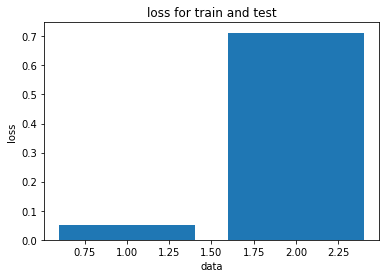

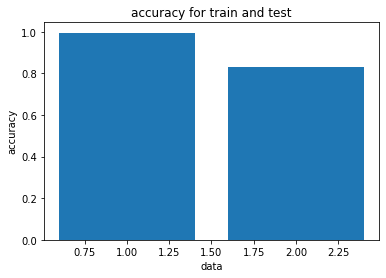

In [ ]:
#train model with many epochs to overfit
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=90
)

model_stats(model)

loss=model.history.history['loss'][len(model.history.history['loss'])-1]
accuracy=model.history.history['accuracy'][len(model.history.history['accuracy'])-1]

#evaluate overfitted model on test
results = model.evaluate(test_data, batch_size=32)
print(model.metrics_names, results)

plt.bar([1,2], [loss, results[0]])
plt.xlabel("data")
plt.ylabel("loss")
plt.title("loss for train and test")
plt.show()

plt.bar([1,2], [accuracy, results[1]])
plt.xlabel("data")
plt.ylabel("accuracy")
plt.title("accuracy for train and test")
plt.show()

Epoch 1/90
62/62 [==============================] - 26s 357ms/step - loss: 1.5002 - accuracy: 0.3574 - precision: 0.6635 - recall: 0.3466
Epoch 2/90
62/62 [==============================] - 25s 355ms/step - loss: 1.2374 - accuracy: 0.4619 - precision: 0.5669 - recall: 0.2279
Epoch 3/90
62/62 [==============================] - 25s 357ms/step - loss: 1.1193 - accuracy: 0.5084 - precision: 0.6834 - recall: 0.2376
Epoch 4/90
62/62 [==============================] - 25s 356ms/step - loss: 1.0979 - accuracy: 0.5228 - precision: 0.6535 - recall: 0.2888
Epoch 5/90
62/62 [==============================] - 25s 360ms/step - loss: 1.0877 - accuracy: 0.5407 - precision: 0.6873 - recall: 0.2734
Epoch 6/90
62/62 [==============================] - 25s 360ms/step - loss: 1.0420 - accuracy: 0.5489 - precision: 0.7035 - recall: 0.3328
Epoch 7/90
62/62 [==============================] - 25s 357ms/step - loss: 0.9919 - accuracy: 0.5832 - precision: 0.7303 - recall: 0.3743
Epoch 8/90
62/62 [================

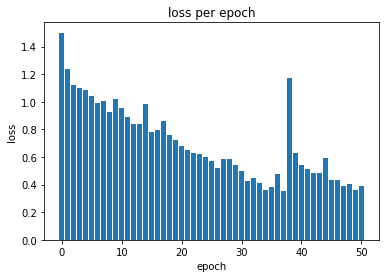

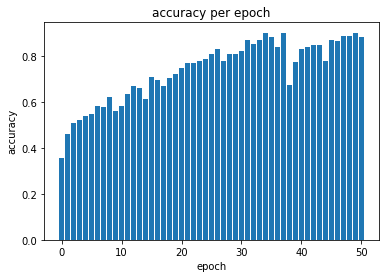

recalls: [0.34658074378967285, 0.22785457968711853, 0.2375832051038742, 0.28878647089004517, 0.27342548966407776, 0.3328213095664978, 0.3742959499359131, 0.3906809985637665, 0.4290834665298462, 0.40194571018218994, 0.4383000433444977, 0.46338966488838196, 0.4910394251346588, 0.5084485411643982, 0.460317462682724, 0.543266773223877, 0.5724526643753052, 0.5437787771224976, 0.5693804621696472, 0.5995903611183167, 0.6344085931777954, 0.6651305556297302, 0.6763952970504761, 0.6886840462684631, 0.695852518081665, 0.7342550158500671, 0.7480798959732056, 0.7132616639137268, 0.7450076937675476, 0.7414234280586243, 0.7624167799949646, 0.8151561617851257, 0.8049154877662659, 0.8213005661964417, 0.8602150678634644, 0.838197648525238, 0.8008192777633667, 0.8561187982559204, 0.4997439980506897, 0.6538658738136292, 0.7204301357269287, 0.7444956302642822, 0.7736815214157104, 0.7711213231086731, 0.7178699374198914, 0.8064516186714172, 0.8049154877662659, 0.8341013789176941, 0.8218125700950623, 0.854070

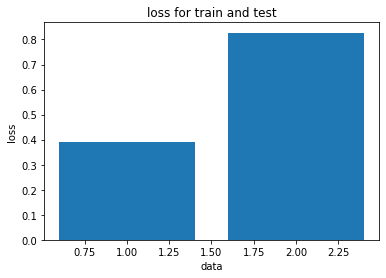

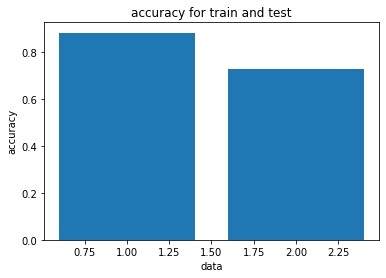

In [ ]:
#stop when overfitting happens
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

es = keras.callbacks.EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=50)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=90,
  callbacks=[es]
)

model_stats(model)

loss=model.history.history['loss'][len(model.history.history['loss'])-1]
accuracy=model.history.history['accuracy'][len(model.history.history['accuracy'])-1]

#evaluate new model on test
results = model.evaluate(test_data, batch_size=32)
print(model.metrics_names, results)

plt.bar([1,2], [loss, results[0]])
plt.xlabel("data")
plt.ylabel("loss")
plt.title("loss for train and test")
plt.show()

plt.bar([1,2], [accuracy, results[1]])
plt.xlabel("data")
plt.ylabel("accuracy")
plt.title("accuracy for train and test")
plt.show()

Epoch 1/20
62/62 [==============================] - 26s 360ms/step - loss: 0.2694 - accuracy: 0.3159 - precision: 0.4398 - recall: 0.4157
Epoch 2/20
62/62 [==============================] - 25s 355ms/step - loss: 0.3676 - accuracy: 0.2616 - precision: 0.2616 - recall: 0.2616
Epoch 3/20
62/62 [==============================] - 25s 360ms/step - loss: 0.3692 - accuracy: 0.2606 - precision: 0.2606 - recall: 0.2606
Epoch 4/20
62/62 [==============================] - 25s 360ms/step - loss: 0.3691 - accuracy: 0.2606 - precision: 0.2606 - recall: 0.2606
Epoch 5/20
62/62 [==============================] - 25s 356ms/step - loss: 0.3686 - accuracy: 0.2606 - precision: 0.2608 - recall: 0.2606
Epoch 6/20
62/62 [==============================] - 25s 358ms/step - loss: 0.3087 - accuracy: 0.3195 - precision: 0.3190 - recall: 0.3185
Epoch 7/20
62/62 [==============================] - 25s 359ms/step - loss: 0.2451 - accuracy: 0.3840 - precision: 0.3858 - recall: 0.3728
Epoch 8/20
62/62 [================

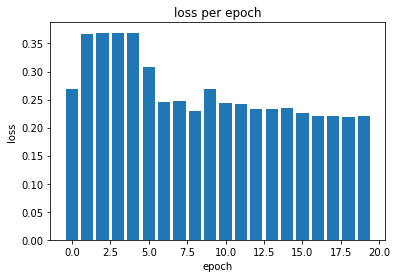

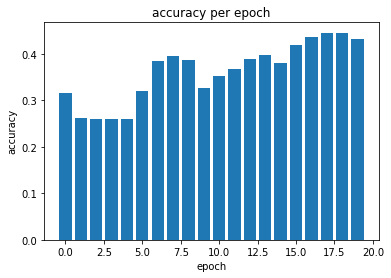

recalls: [0.4156820476055145, 0.2616487443447113, 0.2606246769428253, 0.2606246769428253, 0.2606246769428253, 0.3184843957424164, 0.3727598488330841, 0.39426523447036743, 0.35279056429862976, 0.3256528377532959, 0.35330259799957275, 0.36712750792503357, 0.3876087963581085, 0.3973374366760254, 0.379416286945343, 0.4193548262119293, 0.4372759759426117, 0.4439324140548706, 0.4454685151576996, 0.43113160133361816]
percisions: [0.43977272510528564, 0.2616487443447113, 0.2606246769428253, 0.2606246769428253, 0.2607581913471222, 0.3189743459224701, 0.38579756021499634, 0.39466941356658936, 0.39734718203544617, 0.32615384459495544, 0.35384616255760193, 0.3678809702396393, 0.38860368728637695, 0.39754098653793335, 0.3801949620246887, 0.42064714431762695, 0.43930041790008545, 0.44598764181137085, 0.4482225775718689, 0.43424445390701294]
f1s: [0.42738817453444145, 0.2616487443447113, 0.2606246769428253, 0.2606246769428253, 0.2606914170499585, 0.318729182544823, 0.3791666616410293, 0.3944672204859

In [ ]:
#train with MSE loss function
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=20
)
model_stats(model)

Epoch 1/20
62/62 [==============================] - 19s 273ms/step - loss: 1.5069 - accuracy: 0.3641 - precision: 0.3937 - recall: 0.0891
Epoch 2/20
62/62 [==============================] - 18s 271ms/step - loss: 1.2236 - accuracy: 0.4506 - precision: 0.6360 - recall: 0.1736
Epoch 3/20
62/62 [==============================] - 19s 273ms/step - loss: 1.1590 - accuracy: 0.4844 - precision: 0.6779 - recall: 0.2058
Epoch 4/20
62/62 [==============================] - 19s 274ms/step - loss: 1.1335 - accuracy: 0.4941 - precision: 0.6571 - recall: 0.2698
Epoch 5/20
62/62 [==============================] - 19s 272ms/step - loss: 1.0922 - accuracy: 0.5300 - precision: 0.6822 - recall: 0.2847
Epoch 6/20
62/62 [==============================] - 19s 273ms/step - loss: 1.0758 - accuracy: 0.5259 - precision: 0.7013 - recall: 0.2934
Epoch 7/20
62/62 [==============================] - 19s 276ms/step - loss: 1.0516 - accuracy: 0.5469 - precision: 0.6992 - recall: 0.3118
Epoch 8/20
62/62 [================

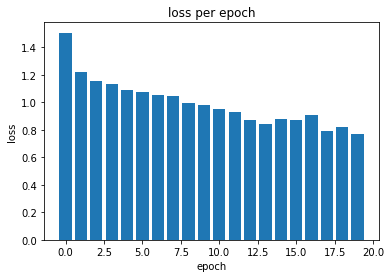

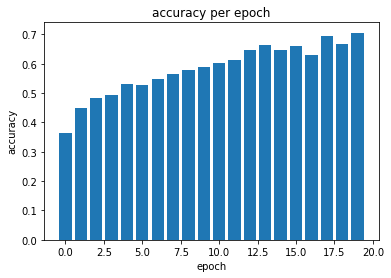

recalls: [0.08909370005130768, 0.1735791116952896, 0.2058371752500534, 0.2698412835597992, 0.2846902310848236, 0.2933947741985321, 0.31182795763015747, 0.3328213095664978, 0.37071171402931213, 0.4034818112850189, 0.41628265380859375, 0.4265232980251312, 0.46390169858932495, 0.4864311218261719, 0.49513569474220276, 0.5104966759681702, 0.4695340394973755, 0.540194571018219, 0.523809552192688, 0.5657961964607239]
percisions: [0.3936651647090912, 0.6360225081443787, 0.6779089570045471, 0.6571072340011597, 0.6822085976600647, 0.7013463973999023, 0.6991963386535645, 0.6900212168693542, 0.7247247099876404, 0.7150635123252869, 0.7344173192977905, 0.7397868633270264, 0.7810344696044922, 0.7983193397521973, 0.7496123909950256, 0.7657449841499329, 0.7341873645782471, 0.8255085945129395, 0.7657185792922974, 0.8071585297584534]
f1s: [0.145302711831704, 0.27272727543152586, 0.31578947775541905, 0.38257714662700565, 0.4017341164183803, 0.41371840992455844, 0.4313031191559809, 0.44905009146885466, 0.4

In [ ]:
#without regularization:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=20
)
model_stats(model)

Epoch 1/20
62/62 [==============================] - 25s 348ms/step - loss: 1.5344 - accuracy: 0.3538 - precision: 0.4304 - recall: 0.1551
Epoch 2/20
62/62 [==============================] - 25s 348ms/step - loss: 1.2450 - accuracy: 0.4470 - precision: 0.5976 - recall: 0.1818
Epoch 3/20
62/62 [==============================] - 25s 349ms/step - loss: 1.1752 - accuracy: 0.4747 - precision: 0.6681 - recall: 0.2309
Epoch 4/20
62/62 [==============================] - 25s 346ms/step - loss: 1.1818 - accuracy: 0.4772 - precision: 0.6284 - recall: 0.2581
Epoch 5/20
62/62 [==============================] - 25s 350ms/step - loss: 1.0971 - accuracy: 0.5417 - precision: 0.7002 - recall: 0.3062
Epoch 6/20
62/62 [==============================] - 25s 347ms/step - loss: 1.0770 - accuracy: 0.5571 - precision: 0.6964 - recall: 0.3323
Epoch 7/20
62/62 [==============================] - 25s 349ms/step - loss: 1.1232 - accuracy: 0.5294 - precision: 0.6474 - recall: 0.3328
Epoch 8/20
62/62 [================

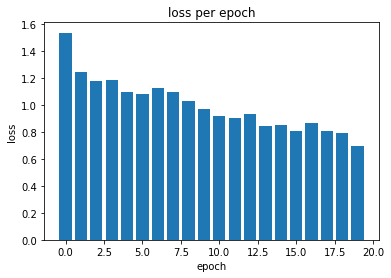

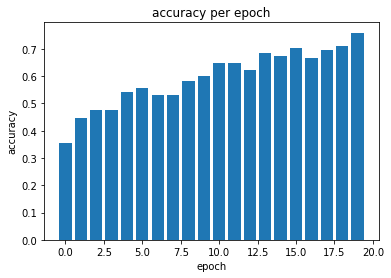

recalls: [0.15514592826366425, 0.1817716360092163, 0.2309267818927765, 0.25806450843811035, 0.30619558691978455, 0.3323092758655548, 0.3328213095664978, 0.35330259799957275, 0.38556066155433655, 0.41013824939727783, 0.4454685151576996, 0.46492576599121094, 0.48131081461906433, 0.5243215560913086, 0.539170503616333, 0.559651792049408, 0.5427547097206116, 0.5739887356758118, 0.5878136157989502, 0.6308243870735168]
percisions: [0.43039771914482117, 0.5976430773735046, 0.6681481599807739, 0.6284289360046387, 0.7002341747283936, 0.696351945400238, 0.6474103331565857, 0.6400741934776306, 0.6972222328186035, 0.7514071464538574, 0.7493540048599243, 0.7793991565704346, 0.7366771101951599, 0.784073531627655, 0.7559224963188171, 0.783512532711029, 0.7658959627151489, 0.7839160561561584, 0.7917241454124451, 0.8421052694320679]
f1s: [0.2280767760177035, 0.27875932557721955, 0.3432267928420155, 0.36588021146679844, 0.4260776504882477, 0.44991335522257736, 0.439634766960749, 0.4552952664252327, 0.496

In [ ]:
#train with l2 regularizer
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001),),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=20
)
model_stats(model)

Epoch 1/20
62/62 [==============================] - 29s 405ms/step - loss: 1.5472 - accuracy: 0.3451 - precision: 0.3826 - recall: 0.1456
Epoch 2/20
62/62 [==============================] - 25s 355ms/step - loss: 1.2138 - accuracy: 0.4537 - precision: 0.6162 - recall: 0.1439
Epoch 3/20
62/62 [==============================] - 25s 347ms/step - loss: 1.2140 - accuracy: 0.4455 - precision: 0.6430 - recall: 0.1485
Epoch 4/20
62/62 [==============================] - 25s 348ms/step - loss: 1.1942 - accuracy: 0.4685 - precision: 0.6214 - recall: 0.2110
Epoch 5/20
62/62 [==============================] - 25s 348ms/step - loss: 1.1183 - accuracy: 0.5044 - precision: 0.6934 - recall: 0.2258
Epoch 6/20
62/62 [==============================] - 25s 348ms/step - loss: 1.1523 - accuracy: 0.4757 - precision: 0.6309 - recall: 0.2258
Epoch 7/20
62/62 [==============================] - 25s 351ms/step - loss: 1.0918 - accuracy: 0.5038 - precision: 0.6966 - recall: 0.2704
Epoch 8/20
62/62 [================

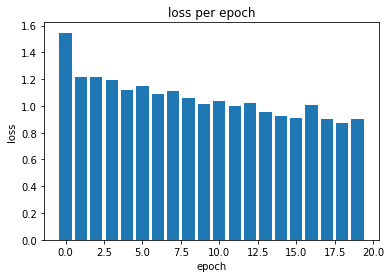

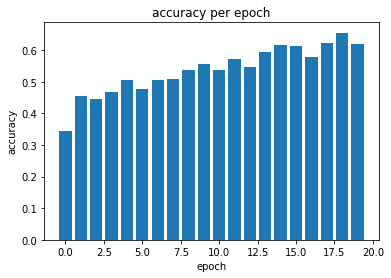

recalls: [0.14564622938632965, 0.1438812017440796, 0.14848950505256653, 0.21095749735832214, 0.22580644488334656, 0.22580644488334656, 0.2703533172607422, 0.23348695039749146, 0.302611380815506, 0.3343574106693268, 0.301075279712677, 0.35483869910240173, 0.3507424592971802, 0.36763954162597656, 0.40092167258262634, 0.4454685151576996, 0.3742959499359131, 0.4193548262119293, 0.4531489908695221, 0.4342038035392761]
percisions: [0.38256409764289856, 0.6162280440330505, 0.6430155038833618, 0.6214178204536438, 0.6933962106704712, 0.6309012770652771, 0.6965699195861816, 0.673559844493866, 0.6769759654998779, 0.7239468097686768, 0.699999988079071, 0.7310126423835754, 0.7040082216262817, 0.7319062352180481, 0.7435897588729858, 0.7532467246055603, 0.7008628845214844, 0.7770398259162903, 0.7682291865348816, 0.7406113743782043]
f1s: [0.2109728472506318, 0.23329181171380137, 0.2412645601349471, 0.31498470800735057, 0.3406720646009187, 0.3325791767638971, 0.3895241758348312, 0.3467680716956135, 0.4

In [ ]:
#with dropout
#train with l2 regularizer
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=20
)
model_stats(model)


Epoch 1/100
62/62 [==============================] - 24s 337ms/step - loss: 1.4273 - accuracy: 0.3763 - precision: 0.4631 - recall: 0.1669
Epoch 2/100
62/62 [==============================] - 24s 338ms/step - loss: 1.2231 - accuracy: 0.4711 - precision: 0.6254 - recall: 0.2248
Epoch 3/100
62/62 [==============================] - 24s 335ms/step - loss: 1.1950 - accuracy: 0.4813 - precision: 0.6023 - recall: 0.2924
Epoch 4/100
62/62 [==============================] - 24s 337ms/step - loss: 1.1266 - accuracy: 0.5243 - precision: 0.6684 - recall: 0.3241
Epoch 5/100
62/62 [==============================] - 24s 338ms/step - loss: 1.1016 - accuracy: 0.5279 - precision: 0.6589 - recall: 0.3472
Epoch 6/100
62/62 [==============================] - 24s 337ms/step - loss: 1.0956 - accuracy: 0.5535 - precision: 0.6518 - recall: 0.3738
Epoch 7/100
62/62 [==============================] - 24s 337ms/step - loss: 1.0589 - accuracy: 0.5648 - precision: 0.6661 - recall: 0.3994
Epoch 8/100
62/62 [========

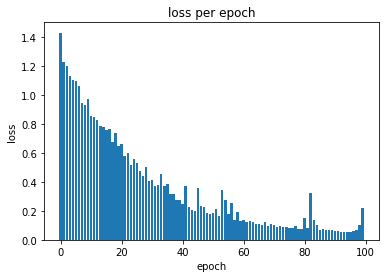

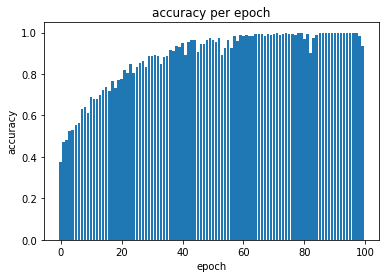

recalls: [0.1669226884841919, 0.22478239238262177, 0.2923707067966461, 0.3241167366504669, 0.3471582233905792, 0.3737839162349701, 0.39938557147979736, 0.44188427925109863, 0.47823861241340637, 0.4659498333930969, 0.5110086798667908, 0.5304659605026245, 0.5519713163375854, 0.5775729417800903, 0.6026625633239746, 0.6134152412414551, 0.6180235743522644, 0.6620583534240723, 0.6461853384971619, 0.68561190366745, 0.6917562484741211, 0.7255504131317139, 0.7311828136444092, 0.7736815214157104, 0.7470558285713196, 0.7670251131057739, 0.7987711429595947, 0.8074756860733032, 0.779313862323761, 0.8366615176200867, 0.8448540568351746, 0.8525345325469971, 0.8474142551422119, 0.8069636225700378, 0.8535585999488831, 0.8479262590408325, 0.8853046298027039, 0.8837685585021973, 0.9144905209541321, 0.9022017121315002, 0.9283154010772705, 0.858678936958313, 0.9334357380867004, 0.9431643486022949, 0.9518688917160034, 0.8806963562965393, 0.9257552623748779, 0.9283154010772705, 0.9585253596305847, 0.96364569

In [ ]:
#final model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Resizing(50, 50),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001),),
  #tf.keras.layers.Dense(200, activation='relu'),
  #tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=opt,
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=metric)
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=32,
  epochs=100,
)
model_stats(model)

In [ ]:
results = model.evaluate(test_data, batch_size=32)
print(model.metrics_names, results)
print("f1:", (2*(results[2]*results[3])/(results[2]+results[3])))

27/27 [==============================] - 114s 4s/step - loss: 1.1082 - accuracy: 0.7536 - precision: 0.7633 - recall: 0.7488
['loss', 'accuracy', 'precision', 'recall'] [1.1082351207733154, 0.7535714507102966, 0.7633495330810547, 0.7488095164299011]
f1: 0.7560096207052776


correct


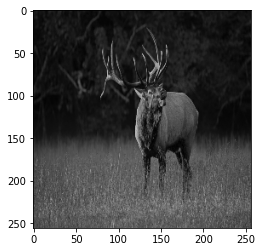

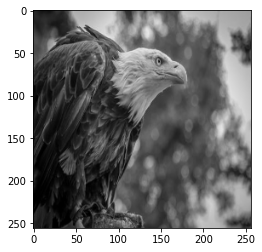

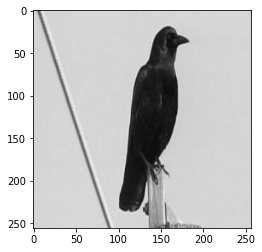

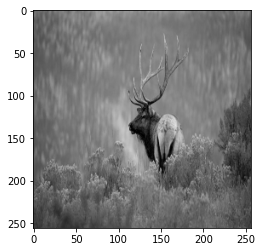

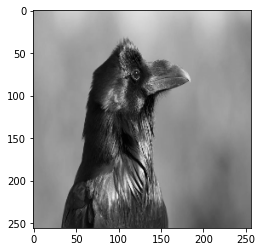

wrong


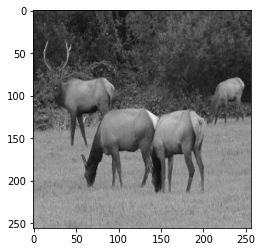

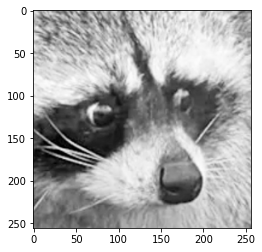

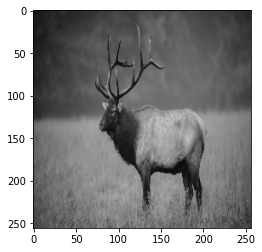

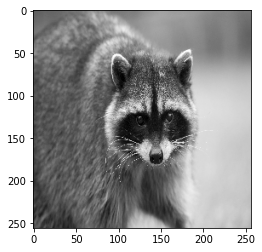

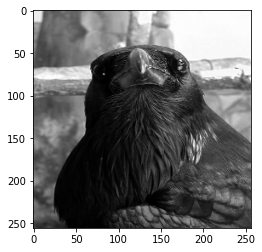

In [ ]:
labels=[]
images=[]
for image, label in test_data:
  for i in range(len(label)):
    labels.append(label[i])
    images.append(image[i])
correct_classes=[]
for i in range(len(labels)):
  correct_classes.append(list(labels[i]).index(1))
predictions = model.predict(test_data)
predicted_classes=[]
for i in predictions:
  max=0
  maxindex=0
  for j in range(len(i)):
    if(i[j]>max):
      max=i[j]
      maxindex=j
  predicted_classes.append(maxindex)
print("correct")
count=10
for i in range(len(predicted_classes)):
  if(predicted_classes[i]==correct_classes[i]):
    count-=1
    image=tf.image.grayscale_to_rgb(images[i])
    plt.imshow(image.numpy().astype("uint8"))
    plt.show()
    count-=1
  if(count==0):
     break
print("wrong")
count=10
for i in range(len(predicted_classes)):
  if(predicted_classes[i]!=correct_classes[i]):
    count-=1
    image=tf.image.grayscale_to_rgb(images[i])
    plt.imshow(image.numpy().astype("uint8"))
    plt.show()
    count-=1
  if(count==0):
     break